# Lab 2 - TIER protocol i Tidydata
## Arkadiusz Orzeł 403481

In [2]:
# import
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
from regex_operation import re_weather

In [3]:
# ścieżka do folderu z danymi do analizy
DIR = "../AnalysisData/"

In [4]:
# otworzenie pliku i odczytanie danych
with open(f'{DIR}weather.txt') as f:
    weather = f.read()

# zastosowanie wyrażeń regularnych do oczyszczenia pliku
weather = re_weather(weather)
# zapisanie do pliku
pathlib.Path("../AnalysisData/weather_clean.txt").write_text(weather)

255316

In [5]:
# wczytanie danych do obiektu DataFrame
weather = pd.read_table(f"{DIR}weather_clean.txt", sep=" ", header=None)
# usunięcie kolumny 32 (zawiera NaN)
weather.drop(32, axis=1, inplace=True)
# Rozdzielenie nazwy na nowe kolumny ['Rok', 'Miesiąc', 'Element']
weather['Year'] = weather[0].str.slice(11,15)
weather['Month'] = weather[0].str.slice(15,17)
weather['Element'] = weather[0].str.slice(17,21)
# zmiana nazwy pierwszej kolumny na ['Nazwę urządzenie']
weather[0] = weather[0].str.slice(stop=11)
weather.rename(columns={0: 'Name'}, inplace=True)

# słownik do modyfikacji nazwy kolumn dni
day_map = {}
for x in range(1, 32):
    day_map[x] = f'd{x}'
#zmiana nazwy kolumn dni
weather.rename(columns=day_map, inplace=True)
#zamiana miejsc kolumn
weather = weather[[weather.columns[0], *weather.columns[32:35], *weather.columns[1:32]]]
weather.to_csv("../AnalysisData/weather_processed.csv")
weather

,Name,Year,Month,Element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX000017004,1955,04,TMAX,310,310,310,320,330,320,...,330,330,330,330,330,330,340,330,320,-9999.0
1,MX000017004,1955,04,TMIN,150,150,160,150,160,160,...,170,170,170,180,190,190,170,180,160,-9999.0
2,MX000017004,1955,04,PRCP,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,-9999.0
3,MX000017004,1955,05,TMAX,310,310,310,300,300,300,...,330,340,350,330,310,310,320,310,300,290.0
4,MX000017004,1955,05,TMIN,200,160,160,150,150,150,...,170,190,190,190,180,160,150,170,150,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,MX000017004,2011,03,TMIN,-9999,-9999,-9999,-9999,148,-9999,...,-9999,-9999,-9999,-9999,162,-9999,-9999,-9999,-9999,170.0
1712,MX000017004,2011,03,PRCP,0,-9999,0,0,0,-9999,...,0,-9999,0,-9999,0,-9999,-9999,0,-9999,0.0
1713,MX000017004,2011,04,TMAX,-9999,350,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999.0
1714,MX000017004,2011,04,TMIN,-9999,168,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999.0


In [10]:
# zamiana wartości na wartości liczbowe
weather.iloc[:, 4:] = weather.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')
# zastapienie wartości -9999 na wartość NaN
weather.replace(-9999, pd.NA, inplace=True)
# znormalizowanie wartości poprzez podzielenie przez 10
weather.iloc[:, 4:] = weather.iloc[:, 4:].div(10, axis=1)
# ograniczenie danych do terminu w 2010 roku
weather = weather.loc[(weather['Year']>'2009') & (weather['Year']<'2011')]
# zresetowanie indeksowania tabeli
weather_2010 = weather.reset_index(drop=True)
weather_2010.to_csv("../AnalysisData/weather_2010_processed.csv")
weather_2010

,Name,Year,Month,Element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX000017004,2010,01,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX000017004,2010,01,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX000017004,2010,01,PRCP,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,MX000017004,2010,02,TMAX,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX000017004,2010,02,TMIN,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX000017004,2010,02,PRCP,NaN,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,MX000017004,2010,03,TMAX,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MX000017004,2010,03,TMIN,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MX000017004,2010,03,PRCP,NaN,0.0,NaN,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
9,MX000017004,2010,04,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN


In [11]:
#opis danych
weather.describe()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
count,10.000000,13.000000,12.000000,11.000000,17.000000,14.000000,10.000000,11.000000,10.000000,11.000000,...,9.000000,15.000000,7.000000,10.000000,11.000000,17.000000,11.000000,14.000000,15.000000,6.000000
mean,6.220000,7.300000,9.716667,5.154545,10.041176,5.292857,4.100000,9.636364,5.940000,9.509091,...,4.855556,5.566667,2.100000,4.840000,7.745455,8.605882,5.172727,8.050000,3.566667,6.800000
std,10.748726,11.315992,12.517612,9.475375,12.086566,10.062074,9.356638,13.718547,13.283507,14.310587,...,8.509276,10.239606,5.556078,9.978443,14.647823,13.086132,9.816118,11.437304,8.096354,10.998909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.650000,0.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.350000,14.400000,19.150000,6.000000,15.800000,5.825000,0.000000,20.600000,0.000000,17.400000,...,5.800000,6.100000,0.000000,1.675000,6.950000,16.700000,5.350000,17.325000,0.000000,11.550000
max,29.900000,31.300000,30.700000,27.200000,32.100000,27.800000,28.100000,34.500000,39.100000,35.300000,...,23.400000,29.900000,14.700000,29.700000,43.200000,36.300000,31.200000,30.100000,27.800000,25.400000


In [67]:
# przegrupowanie danych 'rok' 'miesiąc' 'element w zależności od 'dnia'
weather_melt = pd.melt(weather, id_vars=['Year', 'Month', 'Element'], var_name='Day', value_vars=[*day_map.values()])
# usunięcie elementów 'NaN'
weather_melt.dropna(inplace=True)
# usunięcie wartości zerowych '0'
weather_melt = weather_melt[weather_melt.value != 0]
weather_melt

,Year,Month,Element,Day,value
26,2010,09,PRCP,d1,18.5
33,2010,12,TMAX,d1,29.9
34,2010,12,TMIN,d1,13.8
39,2010,02,TMAX,d2,27.3
40,2010,02,TMIN,d2,14.4
...,...,...,...,...,...
1044,2010,01,TMAX,d30,27.8
1045,2010,01,TMIN,d30,14.5
1064,2010,07,PRCP,d30,11.2
1101,2010,08,TMAX,d31,25.4


In [73]:
# połączenie roku, miesiąca i dnia w jedną kolumnę
weather_melt['Date'] = weather_melt['Year'] + "-" + weather_melt['Month'] + "-" + weather_melt['Day']

weather_pivot = weather_melt.pivot(index='Date', columns='Element', values='value')
weather_pivot

Element,PRCP,TMAX,TMIN
Date,,,
2010-01-d30,NaN,27.8,14.5
2010-02-d11,NaN,29.7,13.4
2010-02-d2,NaN,27.3,14.4
2010-02-d23,NaN,29.9,10.7
2010-02-d3,NaN,24.1,14.4
...,...,...,...
2010-11-d27,NaN,27.7,14.2
2010-11-d4,NaN,27.2,12.0
2010-11-d5,NaN,26.3,7.9


In [74]:
month_map = {
    0:'Janauary',
    1:'February',
    2:'March',
    3:'April',
    4:'May',
    5:'June',
    6:'July',
    7:'August',
    8:'September',
    9:'October',
    10:'November',
    11:'December'	
}

# minimalna temperatura dla każdego miesiąca
weather_2010_TMIN = weather_2010.groupby('Element').get_group('TMIN').min(axis=1)
# zresetowanie indeksów
weather_2010_TMIN = weather_2010_TMIN.reset_index(drop=True)
weather_2010_TMIN.rename(index=month_map, inplace=True)

# maksymalna temperatura dla każdego miesiąca
weather_2010_TMAX = weather_2010.groupby('Element').get_group('TMIN').max(axis=1)
#zresetowanie indeksów
weather_2010_TMAX = weather_2010_TMAX.reset_index(drop=True)
weather_2010_TMAX.rename(index=month_map, inplace=True)

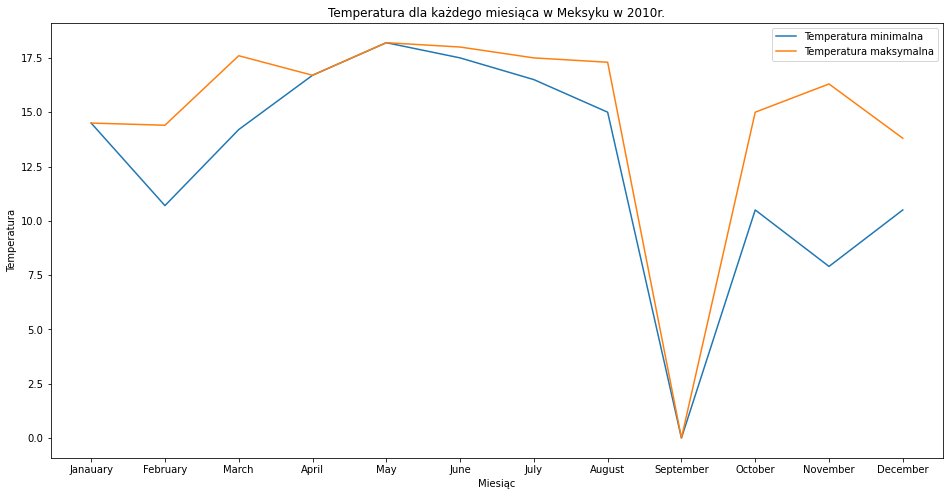

In [96]:
# wykresy zależności temperatur
plt.rcParams["figure.figsize"] = (16,8)
weather_2010_TMIN.plot(label="Temperatura minimalna")
weather_2010_TMAX.plot(label="Temperatura maksymalna")
plt.title("Temperatura dla każdego miesiąca w Meksyku w 2010r.")
plt.xlabel("Miesiąc")
plt.ylabel("Temperatura")
plt.xticks(range(0, 12), month_map.values())
plt.legend()
plt.savefig("../Documents/WykresTemperaturMeksyk.jpg")
plt.show()